<h2 align=center><font size = 5>Seattle Car Collision Severity Analysis</font></h2>

In [1]:
# Import the library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
filepath = "/Users/John/Documents/GitHub/Related_Data/Data-Collisions.csv" 
df_whole = pd.read_csv(filepath)

In [3]:
df_whole.shape

(194673, 38)

In [ ]:
df_whole.columns

In [3]:
# check the data set summary, only 23 attributes are useful, so create a new dataframe
# 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT','SDOT_COLCODE', 'SDOT_COLDESC',
df = df_whole[['SEVERITYCODE','SEVERITYDESC', 'ADDRTYPE', 'INCDATE','INCDTTM', 'JUNCTIONTYPE', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND','SPEEDING', 'HITPARKEDCAR']]

df_map = df_whole[['SEVERITYCODE','ADDRTYPE','X', 'Y']]


In [ ]:
df.shape

In [ ]:
df.info()

## Identify and handle missing values

### identify missing data 
Convert "?" to NaN
In the car dataset, missing data comes with the question mark "?". We replace "?" with NaN (Not a Number), which is Python's default missing value marker, for reasons of computational speed and convenience. 

In [6]:
# replace "?" to NaN
df.replace("?", np.nan, inplace = True)

In [5]:
df.isnull().head(6)

,SEVERITYCODE,SEVERITYDESC,ADDRTYPE,INCDATE,INCDTTM,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,HITPARKEDCAR
0,False,False,False,False,False,False,True,False,False,False,False,True,False
1,False,False,False,False,False,False,True,False,False,False,False,True,False
2,False,False,False,False,False,False,True,False,False,False,False,True,False
3,False,False,False,False,False,False,True,False,False,False,False,True,False
4,False,False,False,False,False,False,True,False,False,False,False,True,False
5,False,False,False,False,False,False,True,False,False,False,False,True,False


In [7]:
# Evaluating for Missing Data
missing_data = df.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("-----------------------------------")

SEVERITYCODE
False    194673
Name: SEVERITYCODE, dtype: int64
-----------------------------------
SEVERITYDESC
False    194673
Name: SEVERITYDESC, dtype: int64
-----------------------------------
ADDRTYPE
False    192747
True       1926
Name: ADDRTYPE, dtype: int64
-----------------------------------
INCDATE
False    194673
Name: INCDATE, dtype: int64
-----------------------------------
INCDTTM
False    194673
Name: INCDTTM, dtype: int64
-----------------------------------
JUNCTIONTYPE
False    188344
True       6329
Name: JUNCTIONTYPE, dtype: int64
-----------------------------------
INATTENTIONIND
True     164868
False     29805
Name: INATTENTIONIND, dtype: int64
-----------------------------------
UNDERINFL
False    189789
True       4884
Name: UNDERINFL, dtype: int64
-----------------------------------
WEATHER
False    189592
True       5081
Name: WEATHER, dtype: int64
-----------------------------------
ROADCOND
False    189661
True       5012
Name: ROADCOND, dtype: int64
--------

#### Replace missing value by the most frequency:

In [8]:
# which values are present in a particular column, we can use the ".value_counts()" method: df['num-of-doors'].value_counts(), use the ".idxmax()" method to calculate for us the most common type automatically: df['ADDRTYPE'].value_counts().idxmax()
df["ADDRTYPE"].replace(np.nan, df['ADDRTYPE'].value_counts().idxmax(), inplace=True)
df['ADDRTYPE'].value_counts()

Block           128852
Intersection     65070
Alley              751
Name: ADDRTYPE, dtype: int64

In [9]:
df["JUNCTIONTYPE"].replace(np.nan, df['JUNCTIONTYPE'].value_counts().idxmax(), inplace=True)
df["JUNCTIONTYPE"].replace("Unknown", df['JUNCTIONTYPE'].value_counts().idxmax(), inplace=True)
df["JUNCTIONTYPE"].replace("Ramp Junction", 'RampDriveway', inplace=True)
df["JUNCTIONTYPE"].replace("Driveway Junction", 'RampDriveway', inplace=True)
df["JUNCTIONTYPE"].replace("At Intersection (intersection related)", 'At-Intersection', inplace=True)
df["JUNCTIONTYPE"].replace("At Intersection (but not related to intersection)", 'At-Intersection', inplace=True)
df['JUNCTIONTYPE'].value_counts()

Mid-Block (not related to intersection)    96138
At-Intersection                            64908
Mid-Block (but intersection related)       22790
RampDriveway                               10837
Name: JUNCTIONTYPE, dtype: int64

In [10]:
df["UNDERINFL"].replace(np.nan, df['UNDERINFL'].value_counts().idxmax(), inplace=True)
df['UNDERINFL'] = df['UNDERINFL'].map({'N': 0, '0': 0, 'Y': 1, '1': 1})
"""
df["UNDERINFL"].replace("0", "N", inplace=True)
df["UNDERINFL"].replace("1", "Y", inplace=True)
"""
df['UNDERINFL'].value_counts()

0    185552
1      9121
Name: UNDERINFL, dtype: int64

In [11]:
df["WEATHER"].replace(np.nan, df['WEATHER'].value_counts().idxmax(), inplace=True)
df["WEATHER"].replace("Other","Unknown",inplace=True)
df["WEATHER"].replace("Partly Cloudy","Overcast",inplace=True)
df["WEATHER"].replace("Raining","RainSnow",inplace=True)
df["WEATHER"].replace("Snowing","RainSnow",inplace=True)
df["WEATHER"].replace("Sleet/Hail/Freezing Rain","RainSnow",inplace=True)
df["WEATHER"].replace("Fog/Smog/Smoke","RainSnow",inplace=True)
df["WEATHER"].replace("Blowing Sand/Dirt","RainSnow",inplace=True)
df["WEATHER"].replace("Severe Crosswind","RainSnow",inplace=True)
df['WEATHER'].value_counts()

Clear       116216
RainSnow     34815
Overcast     27719
Unknown      15923
Name: WEATHER, dtype: int64

In [12]:
df["ROADCOND"].replace(np.nan, df['ROADCOND'].value_counts().idxmax(), inplace=True)
df["ROADCOND"].replace("Ice", "IceOilWaterSnow", inplace=True)
df["ROADCOND"].replace("Standing Water", "IceOilWaterSnow", inplace=True)
df["ROADCOND"].replace("Oil", "IceOilWaterSnow", inplace=True)
df["ROADCOND"].replace("Snow/Slush", "IceOilWaterSnow", inplace=True)
df["ROADCOND"].replace("Other", "Unknown", inplace=True)
df["ROADCOND"].replace("Sand/Mud/Dirt", "IceOilWaterSnow", inplace=True)
df['ROADCOND'].value_counts()

Dry                129522
Wet                 47474
Unknown             15210
IceOilWaterSnow      2467
Name: ROADCOND, dtype: int64

In [13]:
df["LIGHTCOND"].replace(np.nan, df['LIGHTCOND'].value_counts().idxmax(), inplace=True)
df["LIGHTCOND"].replace("Dark - No Street Lights", "Dark-No-Light", inplace=True)
df["LIGHTCOND"].replace("Dark - Street Lights Off", "Dark-No-Light", inplace=True)
df["LIGHTCOND"].replace("Dark - Unknown Lighting", "Dark-No-Light", inplace=True)
df["LIGHTCOND"].replace("Dark - Street Lights On", "Dark-With-Light", inplace=True)
df["LIGHTCOND"].replace("Other", "Unknown", inplace=True)
df["LIGHTCOND"].replace("Dusk", "DuskDawn", inplace=True)
df["LIGHTCOND"].replace("Dawn", "DuskDawn", inplace=True)
df['LIGHTCOND'].value_counts()

Daylight           121307
Dark-With-Light     48507
Unknown             13708
DuskDawn             8404
Dark-No-Light        2747
Name: LIGHTCOND, dtype: int64

In [14]:
# only has Y, so all the other value should be N
df["INATTENTIONIND"].replace(np.nan, "N", inplace=True)
df["INATTENTIONIND"].describe()

count     194673
unique         2
top            N
freq      164868
Name: INATTENTIONIND, dtype: object

In [15]:
df["SPEEDING"].replace(np.nan, "N", inplace=True)
df["SPEEDING"].describe()

count     194673
unique         2
top            N
freq      185340
Name: SPEEDING, dtype: object

In [16]:
df["SEVERITYDESC"].describe()

count                             194673
unique                                 2
top       Property Damage Only Collision
freq                              136485
Name: SEVERITYDESC, dtype: object

In [ ]:
df.info()

#### Replace missing value by mean:

In [ ]:
avg_norm_loss = df["normalized-losses"].astype("float").mean(axis=0)
print("Average of normalized-losses:", avg_norm_loss)

In [ ]:
df["normalized-losses"].replace(np.nan, avg_norm_loss, inplace=True)

#### Drop the whole row:

In [17]:
# simply drop whole row with NaN in "X" and "Y" column
df_map.dropna(subset=["X"], axis=0, inplace=True)
df_map.shape

(189339, 4)

#### Correct data format

Convert data types to proper format

In [ ]:
df.dtypes

In [18]:
### Convert to date time object
df['INCDTTM'] = pd.to_datetime(df['INCDTTM'])
df['INCDATE'] = pd.to_datetime(df['INCDATE'])

In [ ]:
# double check
df.dtypes

In [19]:
# covert datetime to weekday and hours
df['hourofday'] = df['INCDTTM'].dt.hour
df['dayofweek'] = df['INCDTTM'].dt.dayofweek
df.head(5)

,SEVERITYCODE,SEVERITYDESC,ADDRTYPE,INCDATE,INCDTTM,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,HITPARKEDCAR,hourofday,dayofweek
0,2,Injury Collision,Intersection,2013-03-27 00:00:00+00:00,2013-03-27 14:54:00,At-Intersection,N,0,Overcast,Wet,Daylight,N,N,14,2
1,1,Property Damage Only Collision,Block,2006-12-20 00:00:00+00:00,2006-12-20 18:55:00,Mid-Block (not related to intersection),N,0,RainSnow,Wet,Dark-With-Light,N,N,18,2
2,1,Property Damage Only Collision,Block,2004-11-18 00:00:00+00:00,2004-11-18 10:20:00,Mid-Block (not related to intersection),N,0,Overcast,Dry,Daylight,N,N,10,3
3,1,Property Damage Only Collision,Block,2013-03-29 00:00:00+00:00,2013-03-29 09:26:00,Mid-Block (not related to intersection),N,0,Clear,Dry,Daylight,N,N,9,4
4,2,Injury Collision,Intersection,2004-01-28 00:00:00+00:00,2004-01-28 08:04:00,At-Intersection,N,0,RainSnow,Wet,Daylight,N,N,8,2


In [ ]:
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")

#### data_standardization

In [ ]:
# transform mpg to L/100km in the column of "highway-mpg", and change the name of column to "highway-L/100km" 
df['highway-mpg'] = 235/df["highway-mpg"]
df.rename(columns={'highway-mpg':'highway-L/100km'}, inplace=True)
df.head()

#### Data Normalization

Normalization is the process of transforming values of several variables into a similar range. Typical normalizations include scaling the variable so the variable average is 0, scaling the variable so the variance is 1, or scaling variable so the variable values range from 0 to 1

In [ ]:
# replace (original value) by (original value)/(maximum value)
df['length'] = df['length']/df['length'].max()
df['width'] = df['width']/df['width'].max()

#### Binning

transforming continuous numerical variables into discrete categorical 'bins', for grouped analysis.

&lt;AxesSubplot:xlabel=&#39;X&#39;, ylabel=&#39;count&#39;&gt;

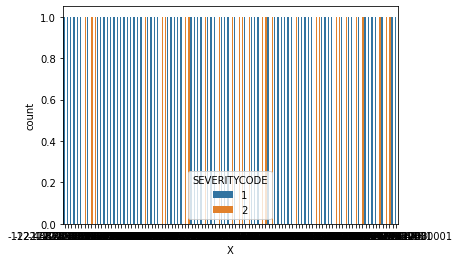

In [25]:
"""
seaborn.countplot(x=None, y=None, hue=None, 
                  data=None, order=None, hue_order=None, 
                  orient=None, color=None, palette=None,
                  saturation=0.75, dodge=True, ax=None, **kwargs)
"""
sns.countplot(x ="X", data= df_map.head(100), hue="SEVERITYCODE")

In [31]:
bins = np.linspace(min(df_map["X"]), max(df_map["X"]), 4)
group_names = ['Low', 'Medium', 'High']
df_map['X-binned'] = pd.cut(df_map['X'], bins, labels=group_names, include_lowest=True )
df_map[['X','X-binned']].head(10)

,X,X-binned
0,-122.323148,Medium
1,-122.347294,Medium
2,-122.334540,Medium
3,-122.334803,Medium
4,-122.306426,Medium
5,-122.387598,Low
6,-122.338485,Medium
7,-122.320780,Medium
8,-122.335930,Medium
9,-122.384700,Low


&lt;AxesSubplot:xlabel=&#39;X-binned&#39;, ylabel=&#39;count&#39;&gt;

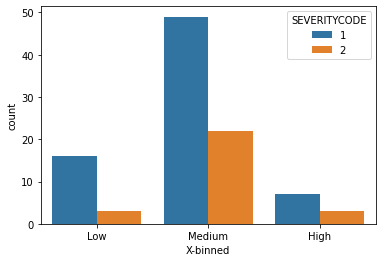

In [27]:
# plot with simple code, no title and other adjustment
sns.countplot(x ="X-binned", data= df_map.head(100), hue="SEVERITYCODE")

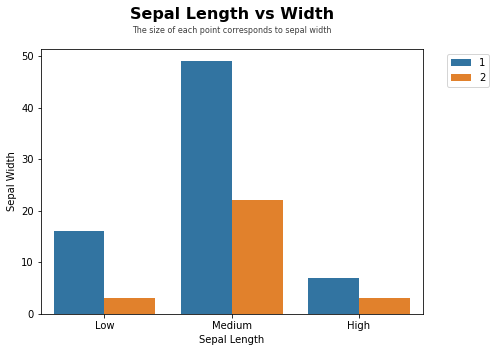

In [32]:
# plot
fig, ax = plt.subplots(figsize=(7,5))

sns.countplot(x ="X-binned", data= df_map.head(100), hue="SEVERITYCODE", ax=ax)

# make adjustments
ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')

ax.text(x=0.5, y=1.1, s='Sepal Length vs Width', fontsize=16, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
ax.text(x=0.5, y=1.05, s='The size of each point corresponds to sepal width', fontsize=8, alpha=0.75, ha='center', va='bottom', transform=ax.transAxes)

h,l = ax.get_legend_handles_labels()
ax.legend(h[:4],l[:4], bbox_to_anchor=(1.05, 1), loc=2)

fig.tight_layout()
plt.show()

#### Indicator variable (or dummy variable)

In [33]:
dummy_variable_1 = pd.get_dummies(df_map["ADDRTYPE"])
dummy_variable_1.rename(columns={'Block':'AddType-Block', 'Intersection':'AddType-Intersection'}, inplace=True)
dummy_variable_1.head()

,AddType-Block,AddType-Intersection
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [34]:
# merge data frame "df" and "dummy_variable_1" 
df_map = pd.concat([df_map, dummy_variable_1], axis=1)
df_map.head(5)
# drop original column "fuel-type" from "df"
# df.drop("fuel-type", axis = 1, inplace=True)

,SEVERITYCODE,ADDRTYPE,X,Y,X-binned,AddType-Block,AddType-Intersection
0,2,Intersection,-122.323148,47.703140,Medium,0,1
1,1,Block,-122.347294,47.647172,Medium,1,0
2,1,Block,-122.334540,47.607871,Medium,1,0
3,1,Block,-122.334803,47.604803,Medium,1,0
4,2,Intersection,-122.306426,47.545739,Medium,0,1


### Analyzing Individual Feature Patterns using Visualization

In [ ]:
df.describe()

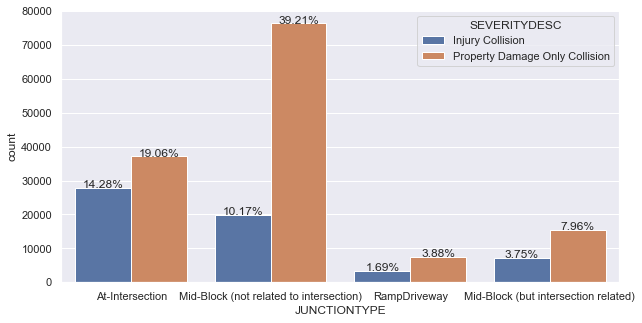

In [21]:
from matplotlib.pyplot import show
import seaborn as sns

plt.figure(figsize=(10,5))
sns.set(style="darkgrid")
#titanic = sns.load_dataset("titanic")
total = float(len(df)) # one person per row 
#ax = sns.barplot(x="class", hue="who", data=titanic)
ax = sns.countplot(x="JUNCTIONTYPE", hue="SEVERITYDESC", data=df) # for Seaborn version 0.7 and more
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 5,
            '{:.2%}'.format(height/total),
            ha="center") 
show()

In [ ]:
from matplotlib.pyplot import show
import seaborn as sns

plt.figure(figsize=(10,5))
sns.set(style="darkgrid")
#titanic = sns.load_dataset("titanic")
total = float(len(df)) # one person per row 
#ax = sns.barplot(x="class", hue="who", data=titanic)
ax = sns.countplot(x="ADDRTYPE", hue="SEVERITYDESC", data=df) # for Seaborn version 0.7 and more
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:.2%}'.format(height/total),
            ha="center") 
show()

In [ ]:
from matplotlib.pyplot import show
import seaborn as sns

plt.figure(figsize=(15,7))
sns.set(style="darkgrid")
#titanic = sns.load_dataset("titanic")
total = float(len(df)) # one person per row 
#ax = sns.barplot(x="class", hue="who", data=titanic)
ax = sns.countplot(x="dayofweek", hue="SEVERITYDESC", data=df) 
# Monday=0, Sunday=6
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2%}'.format(height/total),
            ha="center") 
show()

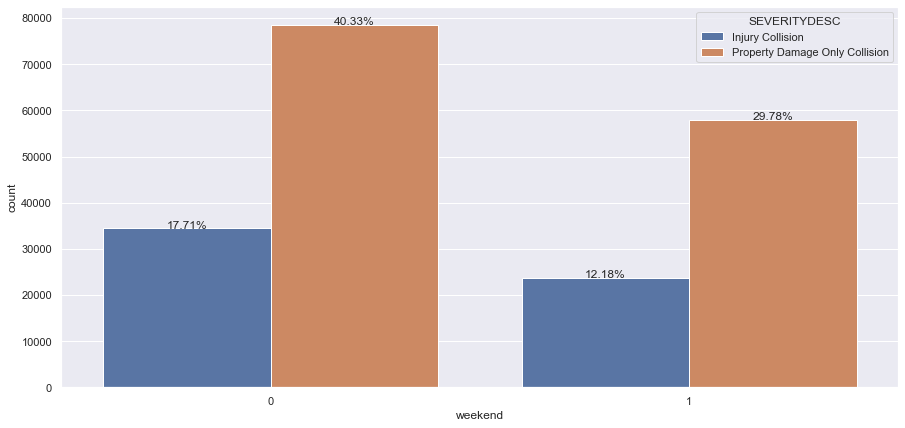

In [22]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)

plt.figure(figsize=(15,7))
sns.set(style="darkgrid")
#titanic = sns.load_dataset("titanic")
total = float(len(df)) # one person per row 
#ax = sns.barplot(x="class", hue="who", data=titanic)
ax = sns.countplot(x="weekend", hue="SEVERITYDESC", data=df) 
# Monday=0, Sunday=6
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2%}'.format(height/total),
            ha="center") 
show()

In [ ]:
from matplotlib.pyplot import show
import seaborn as sns

plt.figure(figsize=(10,5))
sns.set(style="darkgrid")
#titanic = sns.load_dataset("titanic")
total = float(len(df)) # one person per row 
#ax = sns.barplot(x="class", hue="who", data=titanic)
ax = sns.countplot(x="INATTENTIONIND", hue="SEVERITYDESC", data=df) # for Seaborn version 0.7 and more
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2%}'.format(height/total),
            ha="center") 
show()

In [ ]:
from matplotlib.pyplot import show
import seaborn as sns

plt.figure(figsize=(15,8))
sns.set(style="darkgrid")
#titanic = sns.load_dataset("titanic")
total = float(len(df)) # one person per row 
#ax = sns.barplot(x="class", hue="who", data=titanic)
ax = sns.countplot(x="hourofday", hue="SEVERITYDESC", data=df) # for Seaborn version 0.7 and more
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2%}'.format(height/total),
            ha="center") 
show()

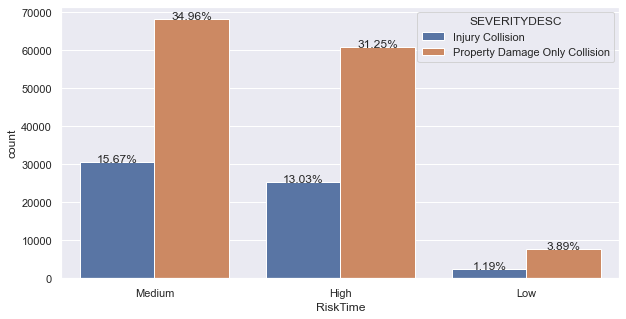

In [23]:
# High risk =1, relative ration > 3; Midum Risk = 0, for 2 > relative ration < 3; 
df['RiskTime'] = df['hourofday'].apply(lambda x: "Low" if x in (1,2,3,4) else ("Medium" if x in (5,6,7,8,9,10,11,12,13,14,15,16) else "High"))

from matplotlib.pyplot import show
import seaborn as sns

plt.figure(figsize=(10,5))
sns.set(style="darkgrid")
#titanic = sns.load_dataset("titanic")
total = float(len(df)) # one person per row 
#ax = sns.barplot(x="class", hue="who", data=titanic)
ax = sns.countplot(x="RiskTime", hue="SEVERITYDESC", data=df) # for Seaborn version 0.7 and more
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2%}'.format(height/total),
            ha="center") 
show()

In [ ]:
from matplotlib.pyplot import show
import seaborn as sns

plt.figure(figsize=(10,5))
sns.set(style="darkgrid")
#titanic = sns.load_dataset("titanic")
total = float(len(df)) # one person per row 
#ax = sns.barplot(x="class", hue="who", data=titanic)
ax = sns.countplot(x="UNDERINFL", hue="SEVERITYDESC", data=df) # for Seaborn version 0.7 and more
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2%}'.format(height/total),
            ha="center") 
show()

In [ ]:
from matplotlib.pyplot import show
import seaborn as sns

plt.figure(figsize=(15,8))
sns.set(style="darkgrid")
#titanic = sns.load_dataset("titanic")
total = float(len(df)) # one person per row 
#ax = sns.barplot(x="class", hue="who", data=titanic)
ax = sns.countplot(x="WEATHER", hue="SEVERITYDESC", data=df) # for Seaborn version 0.7 and more
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2%}'.format(height/total),
            ha="center") 
show()

In [ ]:
from matplotlib.pyplot import show
import seaborn as sns

plt.figure(figsize=(15,8))
sns.set(style="darkgrid")
#titanic = sns.load_dataset("titanic")
total = float(len(df)) # one person per row 
#ax = sns.barplot(x="class", hue="who", data=titanic)
ax = sns.countplot(x="ROADCOND", hue="SEVERITYDESC", data=df) # for Seaborn version 0.7 and more
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2%}'.format(height/total),
            ha="center") 
show()

In [ ]:
from matplotlib.pyplot import show
import seaborn as sns

plt.figure(figsize=(15,8))
sns.set(style="darkgrid")
#titanic = sns.load_dataset("titanic")
total = float(len(df)) # one person per row 
#ax = sns.barplot(x="class", hue="who", data=titanic)
ax = sns.countplot(x="LIGHTCOND", hue="SEVERITYDESC", data=df) # for Seaborn version 0.7 and more
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2%}'.format(height/total),
            ha="center") 
show()

In [ ]:
from matplotlib.pyplot import show
import seaborn as sns

plt.figure(figsize=(10,5))
sns.set(style="darkgrid")
#titanic = sns.load_dataset("titanic")
total = float(len(df)) # one person per row 
#ax = sns.barplot(x="class", hue="who", data=titanic)
ax = sns.countplot(x="SPEEDING", hue="SEVERITYDESC", data=df) # for Seaborn version 0.7 and more
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2%}'.format(height/total),
            ha="center") 
show()

#### Continuous numerical variables and linear relationship

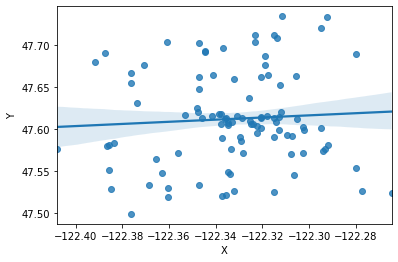

In [24]:
"""
seaborn.regplot(x, y, data=None,x_estimator=None, 
                x_bins=None,x_ci='ci', scatter=True,
                fit_reg=True, ci=95, n_boot=1000,
                units=None, order=1(“可以高阶拟合”), logistic=False,
                lowess=False, robust=False, logx=False,
                x_partial=None, y_partial=None,
                truncate=False, dropna=True,
                x_jitter=None, y_jitter=None, label=None,
                color=None, marker='o', scatter_kws=None,
                line_kws=None, ax=None)

拟合高阶多项式回归并阶段模型预测
sns.regplot(x="x", y="y",
            data=ans.loc[ans.dataset == "II"],
            scatter_kws={"s": 80},
            order=2, ci=None, truncate=True)
plt.show()
"""
sns.regplot(x="X", y="Y",data=df_map.head(100), ci=80)
plt.show()

#### Categorical variables using boxplot

In [ ]:
"""
分类图catplot()
catplot() 分类图(它是下面8种图的接口，下面八种图表均可通过指定kind参数来绘制)
1.stripplot() 分类散点图
2.swarmplot() 能够显示分布密度的分类散点图
3.boxplot() 箱图、盒形图
4.violinplot() 小提琴图
5.boxenplot() 增强箱图
6.pointplot() 点图
7.barplot() 条形图
8.countplot() 计数图

seaborn.catplot(x=None, y=None, hue=None,
                data=None, row=None, col=None,
                col_wrap=None, estimator=<function mean>, ci=95, 
                n_boot=1000, units=None, order=None,
                hue_order=None, row_order=None, col_order=None, 
                kind='strip', height=5, aspect=1, orient=None, 
                color=None, palette=None, legend=True,
                legend_out=True, sharex=True, sharey=True, 
                margin_titles=False, facet_kws=None, **kwargs)
"""

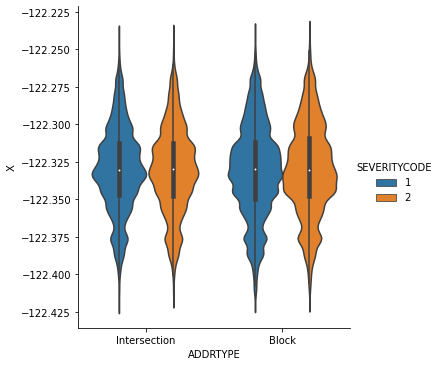

In [22]:
sns.catplot(x="ADDRTYPE", y="X", hue="SEVERITYCODE",data=df_map, kind="violin")
plt.show()

### Descriptive Statistical Analysis

In [ ]:
# The default setting of "describe" skips variables of type object. 
df.describe(include=['object'])

In [ ]:
df['SEVERITYCODE'].value_counts()

#### Grouping

The "groupby" method groups data by different categories. The data is grouped based on one or several variables and analysis is performed on the individual groups.

In [ ]:
df['ADDRTYPE'].unique() #ADDRTYPE	COLLISIONTYPE

In [ ]:
# grouping results
df_gptest = df[['hourofday','ADDRTYPE','SEVERITYCODE']]
grouped_test1 = df_gptest.groupby(['hourofday','ADDRTYPE'],as_index=False).mean()
grouped_test1

In [ ]:
# This grouped data is much easier to visualize when it is made into a pivot table
grouped_pivot = grouped_test1.pivot(index='ADDRTYPE',columns='hourofday')
grouped_pivot

#### Correlation and Causation

It is important to know the difference between these two and that correlation does not imply causation. Determining correlation is much simpler the determining causation as causation may require independent experimentation.

#### ANOVA: Analysis of Variance

test whether there are significant differences between the means of two or more groups. ANOVA returns two parameters:

## Map - Heatmap and other Map with number

In [25]:
# use X Y to form a Piont for maping
df_map["geom"] = df_map["Y"].map(str) + "," + df_map["X"].map(str)
df_map.head()

,SEVERITYCODE,ADDRTYPE,X,Y,geom
0,2,Intersection,-122.323148,47.703140,"47.70314032,-122.32314840000002"
1,1,Block,-122.347294,47.647172,"47.64717249,-122.3472943"
2,1,Block,-122.334540,47.607871,"47.60787143,-122.33453999999999"
3,1,Block,-122.334803,47.604803,"47.60480289,-122.3348033"
4,2,Intersection,-122.306426,47.545739,"47.54573946,-122.3064263"


In [ ]:
import pandas as pd
import geopandas as gpd
import geopy
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
import matplotlib.pyplot as plt
import plotly_express as px
import tqdm
from tqdm._tqdm_notebook import tqdm_notebook

# using X Y data to search for a complete address
locator = Nominatim(user_agent="myGeocoder", timeout=10)
rgeocode = RateLimiter(locator.reverse, min_delay_seconds=0.001)
# show the progress by percentange of searching results
tqdm_notebook.pandas()
df_map["address"] = df_map["geom"].progress_apply(rgeocode)
df_map.head(5)

In [ ]:
df_map["address"][0].raw

In [ ]:
df_map["address"][0].raw['address']['neighbourhood']

In [27]:
# Heatmap plot
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import folium
from folium.plugins import HeatMap

# Create basic Folium Seattle map
injury_map = folium.Map(location=[47.61536892, -122.3302243], 
                       tiles = "OpenStreetMap",
                      zoom_start = 11)

# Add data for heatmp 
data_heatmap = df_map[df_map['SEVERITYCODE']==2]
data_heatmap = df_map[['Y','X']]
data_heatmap = df_map.dropna(axis=0, subset=['Y','X'])
data_heatmap = [[row['Y'],row['X']] for index, row in data_heatmap.head(10000).iterrows()] 
# why 5000? Data too large to process.
HeatMap(data_heatmap, radius=10).add_to(injury_map)

# Plot!
injury_map

&lt;folium.folium.Map at 0x7ffcbd51f310&gt;

In [28]:
#Folium Map
import folium
from folium import plugins

# only show the injury record, not property collision
df_map_injury = df_map[df_map['SEVERITYCODE']==2]
# Make reduced df by selecting every 50th record
reduced_df = df_map_injury.iloc [0::20, 0:]

# let's start again with a clean copy of the map of San Francisco
seattle_map = folium.Map(location=[47.61536892, -122.3302243], zoom_start=10)

# instantiate a mark cluster object for the incidents in the dataframe
incidents = plugins.MarkerCluster().add_to(seattle_map)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng, label, in zip(reduced_df.Y, reduced_df.X, reduced_df.SEVERITYCODE):
    folium.Marker(
    location=[lat, lng],
    icon=None,
    popup=label,
    ).add_to(incidents)

seattle_map.add_child(incidents)

# display map
seattle_map
#seattle_map.save("seattlemap.html")
#webbrowser.open("seattlemap.html")

&lt;folium.folium.Map at 0x7ffcaf2dc610&gt;

# Model Pre-processing:  Feature selection/extraction

In [ ]:
df.columns

In [95]:
# 筛选出有缺失值的列, # 如果是行则为：df.isnull().T.any()
df.isnull().any()

SEVERITYCODE      False
SEVERITYDESC      False
ADDRTYPE          False
INCDATE           False
INCDTTM           False
JUNCTIONTYPE      False
INATTENTIONIND    False
UNDERINFL          True
WEATHER           False
ROADCOND          False
LIGHTCOND         False
SPEEDING          False
HITPARKEDCAR      False
hourofday         False
dayofweek         False
weekend           False
RiskTime          False
dtype: bool

In [24]:
y = df["SEVERITYCODE"]

## Feature selection

In [25]:
# convert these features to numerical values
Feature = df[['ADDRTYPE', 'JUNCTIONTYPE', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND',
       'LIGHTCOND', 'SPEEDING', 'RiskTime','weekend']]
X = Feature.values
X[0:5]

array([[&#39;Intersection&#39;, &#39;At-Intersection&#39;, &#39;N&#39;, 0, &#39;Overcast&#39;, &#39;Wet&#39;,
        &#39;Daylight&#39;, &#39;N&#39;, &#39;Medium&#39;, 0],
       [&#39;Block&#39;, &#39;Mid-Block (not related to intersection)&#39;, &#39;N&#39;, 0,
        &#39;RainSnow&#39;, &#39;Wet&#39;, &#39;Dark-With-Light&#39;, &#39;N&#39;, &#39;High&#39;, 0],
       [&#39;Block&#39;, &#39;Mid-Block (not related to intersection)&#39;, &#39;N&#39;, 0,
        &#39;Overcast&#39;, &#39;Dry&#39;, &#39;Daylight&#39;, &#39;N&#39;, &#39;Medium&#39;, 0],
       [&#39;Block&#39;, &#39;Mid-Block (not related to intersection)&#39;, &#39;N&#39;, 0,
        &#39;Clear&#39;, &#39;Dry&#39;, &#39;Daylight&#39;, &#39;N&#39;, &#39;Medium&#39;, 1],
       [&#39;Intersection&#39;, &#39;At-Intersection&#39;, &#39;N&#39;, 0, &#39;RainSnow&#39;, &#39;Wet&#39;,
        &#39;Daylight&#39;, &#39;N&#39;, &#39;Medium&#39;, 0]], dtype=object)

In [ ]:
df['weekend'].value_counts()

## Convert Categorical features to numerical values

In this case, using LabelEncoder only is **not a good choice, since it brings in a natural ordering for different classes**. For example, under ‘Neighborhood’ feature, class_a has value 5 but class_b has value 24, is class_b ‘greater’ than class_a? The answer is obviously no. Thus allowing model learning this result will lead to poor performance. Therefore, for dataframe containing multi class features, a further step of OneHotEncoder is needed. 

In [26]:
# Categorical boolean mask
categorical_feature_mask = Feature.dtypes==object
categorical_feature_mask

ADDRTYPE           True
JUNCTIONTYPE       True
INATTENTIONIND     True
UNDERINFL         False
WEATHER            True
ROADCOND           True
LIGHTCOND          True
SPEEDING           True
RiskTime           True
weekend           False
dtype: bool

In [101]:
# filter categorical columns using mask and turn it into a list
categorical_cols = Feature.columns[categorical_feature_mask].tolist()
categorical_cols

[&#39;ADDRTYPE&#39;,
 &#39;JUNCTIONTYPE&#39;,
 &#39;INATTENTIONIND&#39;,
 &#39;WEATHER&#39;,
 &#39;ROADCOND&#39;,
 &#39;LIGHTCOND&#39;,
 &#39;SPEEDING&#39;,
 &#39;RiskTime&#39;]

In [30]:
# import labelencoder LabelEncoder converts each class under specified feature to a numerical value.
from sklearn.preprocessing import LabelEncoder
# instantiate labelencoder object
le = LabelEncoder()

In [39]:
# apply le on categorical feature columns
Feature[categorical_cols] = Feature[categorical_cols].apply(lambda col: le.fit_transform(col))
Feature[categorical_cols].head(10)

,ADDRTYPE,JUNCTIONTYPE,INATTENTIONIND,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,RiskTime
0,2,0,0,1,3,2,0,2
1,1,2,0,2,3,1,0,0
2,1,2,0,1,0,2,0,2
3,1,2,0,0,0,2,0,2
4,2,0,0,2,3,2,0,2
5,2,0,0,0,0,2,0,0
6,2,0,0,2,3,2,0,0
7,2,0,0,0,0,2,0,0
8,1,2,0,0,0,2,0,2
9,2,0,0,0,0,2,0,2


In [40]:
X = Feature.values
X[0:5]

array([[2., 0., 0., 0., 1., 3., 2., 0., 2., 0.],
       [1., 2., 0., 0., 2., 3., 1., 0., 0., 0.],
       [1., 2., 0., 0., 1., 0., 2., 0., 2., 0.],
       [1., 2., 0., 0., 0., 0., 2., 0., 2., 1.],
       [2., 0., 0., 0., 2., 3., 2., 0., 2., 0.]])

In [ ]:
"""
# 笨方法-等同于上面的几行代码
from sklearn import preprocessing
le_ADDRTYPE = preprocessing.LabelEncoder()

le_ADDRTYPE.fit(['Intersection', 'Block', 'Alley'])
X[:,0] = le_ADDRTYPE.transform(X[:,0]) 

le_JUNCTIONTYPE = preprocessing.LabelEncoder()
X[:,1] = le_JUNCTIONTYPE.fit([ 'Mid-Block (not related to intersection)', 'RampDriveway',
       'Mid-Block (but intersection related)','At-Intersection']).transform(X[:,1])

le_INATTENTIONIND = preprocessing.LabelEncoder()
X[:,2] = le_INATTENTIONIND.fit(['N', 'Y']).transform(X[:,2]) 

le_UNDERINFL = preprocessing.LabelEncoder()
X[:,3] = le_UNDERINFL.fit(['N', 'Y']).transform(X[:,3]) 

le_WEATHER = preprocessing.LabelEncoder()
X[:,4] = le_WEATHER.fit(['Overcast', 'RainSnow', 'Clear', 'Unknown']).transform(X[:,4]) 

le_ROADCOND = preprocessing.LabelEncoder()
X[:,5] = le_ROADCOND.fit(['Wet', 'Dry', 'Unknown', 'IceOilWaterSnow']).transform(X[:,5]) 

le_LIGHTCOND = preprocessing.LabelEncoder()
X[:,6] = le_LIGHTCOND.fit(['Daylight', 'Dark-With-Light', 'Dark-No-Light', 'Unknown','DuskDawn']).transform(X[:,6]) 

le_SPEEDING = preprocessing.LabelEncoder()
X[:,7] = le_SPEEDING.fit(['N', 'Y']).transform(X[:,7]) 

le_RiskTime = preprocessing.LabelEncoder()
X[:,8] = le_RiskTime.fit(['Medium', 'Low', 'High']).transform(X[:,8]) 

le_weekend = preprocessing.LabelEncoder()
X[:,9] = le_weekend.fit([0, 1]).transform(X[:,9]) 

X[0:5]
"""

## One-Hot-Encoder or Get_Dummies to avoid over-weigh problems

In [53]:
"""
# import OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
# instantiate OneHotEncoder
ohe = OneHotEncoder(categories = categorical_feature_mask, sparse=False ) 
# categorical_features = boolean mask for categorical columns
# sparse = False output an array not sparse matrix

# apply OneHotEncoder on categorical feature columns
Feature_ohe = ohe.fit_transform(Feature[categorical_cols]) # It returns an numpy array
Feature_ohe.head(5)
"""

In [27]:
print(Feature.shape)
dummy_Feature = pd.get_dummies(Feature)
# dummy_variable_1.rename(columns={'Block':'AddType-Block', 'Intersection':'AddType-Intersection'}, inplace=True)
print("----After Dummy Fuction------")
print(dummy_Feature.shape)
dummy_Feature.head(5)

(194673, 10)
----After Dummy Fuction------
(194673, 29)


,UNDERINFL,weekend,ADDRTYPE_Alley,ADDRTYPE_Block,ADDRTYPE_Intersection,JUNCTIONTYPE_At-Intersection,JUNCTIONTYPE_Mid-Block (but intersection related),JUNCTIONTYPE_Mid-Block (not related to intersection),JUNCTIONTYPE_RampDriveway,INATTENTIONIND_N,...,LIGHTCOND_Dark-No-Light,LIGHTCOND_Dark-With-Light,LIGHTCOND_Daylight,LIGHTCOND_DuskDawn,LIGHTCOND_Unknown,SPEEDING_N,SPEEDING_Y,RiskTime_High,RiskTime_Low,RiskTime_Medium
0,0,0,0,0,1,1,0,0,0,1,...,0,0,1,0,0,1,0,0,0,1
1,0,0,0,1,0,0,0,1,0,1,...,0,1,0,0,0,1,0,1,0,0
2,0,0,0,1,0,0,0,1,0,1,...,0,0,1,0,0,1,0,0,0,1
3,0,1,0,1,0,0,0,1,0,1,...,0,0,1,0,0,1,0,0,0,1
4,0,0,0,0,1,1,0,0,0,1,...,0,0,1,0,0,1,0,0,0,1


In [28]:
X = dummy_Feature.values

In [66]:
"""
# merge data frame "df" and "dummy_variable_1" 
Feature = pd.concat([Feature["UNDERINFL","weekend"], dummy_variables], axis=1)
df_map.head(5)
"""

&#39;\n# merge data frame &quot;df&quot; and &quot;dummy_variable_1&quot; \nFeature = pd.concat([Feature[&quot;UNDERINFL&quot;,&quot;weekend&quot;], dummy_variables], axis=1)\ndf_map.head(5)\n&#39;

## Model

In [29]:
from sklearn.model_selection import train_test_split
#Test/Train split
X_train_raw, X_test, y_train_raw, y_test = train_test_split(X, y, test_size=0.4, random_state=4)
print ('Train set:', X_train_raw.shape,  y_train_raw.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (116803, 29) (116803,)
Test set: (77870, 29) (77870,)


In [ ]:
# Balance the Data using SMOTE mathod
#!pip3 install -U imbalanced-learn

In [30]:
# Balance the Data using SMOTE mathod, system will generate more data to balance the unbalanced data
import imblearn
from imblearn.over_sampling import SMOTE

os = SMOTE (random_state=0)
X_train, y_train = os.fit_sample(X_train_raw, y_train_raw)
print ('Train set:', X_train.shape,  y_train.shape)

Train set: (163758, 29) (163758,)


In [31]:
print("----------Sample % before SMOTE--------------")
print(y_train_raw.value_counts()/len(y_train_raw))
print("----------Sample % After SMOTE --------------")
print(pd.Series(y_train).value_counts()/len(y_train))

----------Sample % before SMOTE--------------
1    0.701001
2    0.298999
Name: SEVERITYCODE, dtype: float64
----------Sample % After SMOTE --------------
2    0.5
1    0.5
Name: SEVERITYCODE, dtype: float64


# Classification 

## K Nearest Neighbor(KNN)


In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

# Find the best K between 1 an 10
grid_params = {'n_neighbors': [i for i in range(1, 10)]}
grid = GridSearchCV(KNeighborsClassifier(),grid_params,cv = 5)
grid_results = grid.fit(X_train, y_train)

&lt;AxesSubplot:&gt;

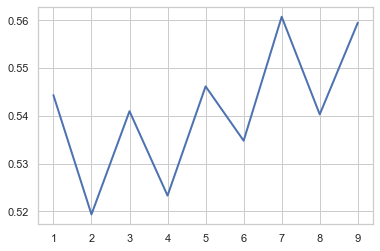

In [33]:
# visual the result of finding best K
sns.set_style("whitegrid")
sns.lineplot(grid_params['n_neighbors'], grid_results.cv_results_['mean_test_score'], palette="hls", linewidth=2)

In [34]:
print("The best n_neighbors was  : ", grid_results.best_params_['n_neighbors'])
print("The best accuracy was with:", grid_results.best_score_.round(2))

The best n_neighbors was  :  7
The best accuracy was with: 0.56


In [43]:
# using the best K (5) to model
#neigh = KNeighborsClassifier(n_neighbors = grid_results.best_params_.get('n_neighbors')).fit(X_train,y_train)
neigh = KNeighborsClassifier(n_neighbors = 6).fit(X_train,y_train)
yhat_train = neigh.predict(X_train)

In [36]:
print("KNN Accuracy     : {:.2f}".format(metrics.accuracy_score(y_train, yhat_train)))
print("KNN Jaccard index: {:.2f}".format(metrics.jaccard_score(y_train, yhat_train)))
print("KNN F1-score     : {:.2f}".format(metrics.f1_score(y_train, yhat_train, average='weighted')))

KNN Accuracy     : 0.56
KNN Jaccard index: 0.47
KNN F1-score     : 0.54


[[63875 18004]
 [54314 27565]]
              precision    recall  f1-score   support

           1       0.54      0.78      0.64     81879
           2       0.60      0.34      0.43     81879

    accuracy                           0.56    163758
   macro avg       0.57      0.56      0.54    163758
weighted avg       0.57      0.56      0.54    163758



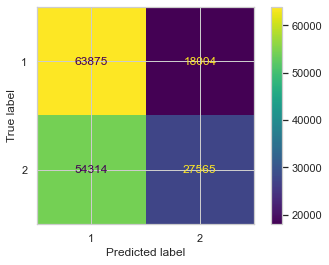

In [37]:
# Train data result: Confusion Matrix and report
import sklearn
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

print(confusion_matrix(y_train, yhat_train))
print(classification_report(y_train, yhat_train))

plot_confusion_matrix(neigh, X_train, y_train, include_values=True)
plt.show()  

[[47045  7561]
 [18858  4406]]
              precision    recall  f1-score   support

           1       0.71      0.86      0.78     54606
           2       0.37      0.19      0.25     23264

    accuracy                           0.66     77870
   macro avg       0.54      0.53      0.52     77870
weighted avg       0.61      0.66      0.62     77870



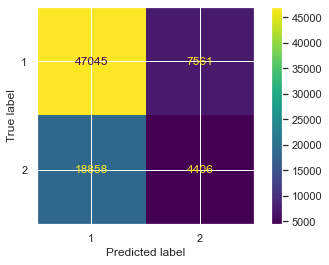

In [44]:
# Test dataset result
yhat_test = neigh.predict(X_test)

print(confusion_matrix(y_test, yhat_test))
print(classification_report(y_test, yhat_test))

plot_confusion_matrix(neigh, X_test, y_test, include_values=True)
plt.show() 

In [45]:
# Find the best recall parameter and plot it
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = neigh.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

ValueError: y_true takes value in {1, 2} and pos_label is not specified: either make y_true take value in {0, 1} or {-1, 1} or pass pos_label explicitly.

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz
import matplotlib.image as mpimg

# Find the best para
tree_grid_params = {'criterion': ['entropy'], 'max_depth': [i for i in range(3,30)]}
tree_grid = GridSearchCV(tree.DecisionTreeClassifier(), tree_grid_params, cv = 3)
tree_grid_results = tree_grid.fit(X_train, y_train)

#plot the result of finding best para
sns.set_style("whitegrid")
sns.lineplot(tree_grid_params['max_depth'], tree_grid_results.cv_results_['mean_test_score'], palette="hls", linewidth=2)
print("The best tree_depth was: ",tree_grid_results.best_params_["max_depth"])
print("The best accuracy was  : ",tree_grid_results.best_score_)

In [ ]:
# using the best result
carTree = DecisionTreeClassifier(criterion="entropy", max_depth = tree_grid_results.best_params_.get('max_depth'))
carTree.fit(X_train,y_train)
y_predTree = carTree.predict(X_train)

In [ ]:
print("loanTree Jaccard index: {:.2f}".format(metrics.jaccard_score(y_train, y_predTree)))
print("loanTree F1-score     : {:.2f}".format(metrics.f1_score(y_train, y_predTree, average='weighted')))

In [ ]:
# # Confusion Matrix and report - Train data
import sklearn
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

print(confusion_matrix(y_train, y_predTree))
print(classification_report(y_train, y_predTree))

plot_confusion_matrix(carTree, X_train, y_train, include_values=True)
plt.show()  

In [ ]:
# # Confusion Matrix and report - Train data
y_test_predTree = carTree.predict(X_test)
print(confusion_matrix(y_test, y_test_predTree))
print(classification_report(y_test, y_test_predTree))

In [ ]:
# Visualize the result
plot_confusion_matrix(carTree, X_test, y_test, include_values=True)
plt.show() 

In [ ]:
# Visualize Decision Tree
#!pip3 install pydot
#!pip3 install graphviz
import pandas as pd
import numpy as np
from sklearn import tree
import pydot
from IPython.display import Image
from sklearn.externals.six import StringIO

X = df[['ADDRTYPE', 'JUNCTIONTYPE', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND',
       'LIGHTCOND', 'SPEEDING', 'RiskTime','weekend']]

from sklearn import tree
plt.figure(figsize=(40,20))  
_ = tree.plot_tree(carTree, feature_names = X.columns, 
             filled=True, fontsize=6, rounded = True)
plt.show()
plt.savefig('filename.png')


## Logistic Regression

In [114]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# find the best para
grid_params = {"C":np.logspace(-3,3,7), "penalty":["l1","l2"]} # l1 lasso l2 ridge
LR_grid = GridSearchCV(LogisticRegression(),grid_params,cv=3)
LR_grid.fit(X_train,y_train)

print("The best parameter was: ",LR_grid.best_params_) # {'C': 0.001, 'penalty': 'l2'}
print("The best accuracy was : ",LR_grid.best_score_)

The best parameter was:  {&#39;C&#39;: 0.01, &#39;penalty&#39;: &#39;l2&#39;}
The best accuracy was :  0.6201943627266099


In [115]:
# Using the best parameter to model
LR = LogisticRegression(C=0.01, solver='liblinear',penalty='l2').fit(X,y)
yhat_train_LR = LR.predict(X_train)
yhat_train_LR_prob = LR.predict_proba(X_train)

In [116]:
print("LR Jaccard index: {:.2f}".format(metrics.jaccard_score(y_train, yhat_train_LR)))
print("LR F1-score     : {:.2f}".format(metrics.f1_score(y_train, yhat_train_LR, average='weighted')))
print("LR Log Loss     : {:.2f}".format(metrics.log_loss(y_train, yhat_train_LR_prob)))

LR Jaccard index: 0.50
LR F1-score     : 0.39
LR Log Loss     : 0.72


[[77195  2347]
 [74797  4745]]
              precision    recall  f1-score   support

           1       0.51      0.97      0.67     79542
           2       0.67      0.06      0.11     79542

    accuracy                           0.52    159084
   macro avg       0.59      0.52      0.39    159084
weighted avg       0.59      0.52      0.39    159084



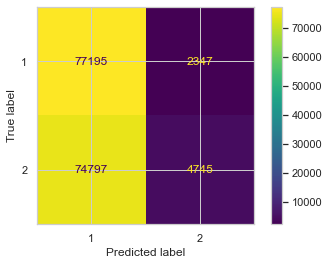

In [117]:
# # Confusion Matrix and report - Train data
import sklearn
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

print(confusion_matrix(y_train, yhat_train_LR))
print(classification_report(y_train, yhat_train_LR))

plot_confusion_matrix(LR, X_train, y_train, include_values=True)
plt.show()  

[[51461  1627]
 [21425  1403]]
              precision    recall  f1-score   support

           1       0.71      0.97      0.82     53088
           2       0.46      0.06      0.11     22828

    accuracy                           0.70     75916
   macro avg       0.58      0.52      0.46     75916
weighted avg       0.63      0.70      0.60     75916



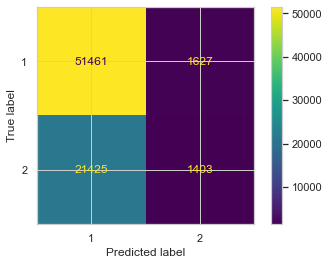

In [118]:
# # Confusion Matrix and report - Train data
yhat_test_LR = LR.predict(X_test)

print(confusion_matrix(y_test, yhat_test_LR))
print(classification_report(y_test, yhat_test_LR))

plot_confusion_matrix(LR, X_test, y_test, include_values=True)
plt.show()  